In [1]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
print(train_data.shape, test_data.shape)

(25000,) (25000,)


In [6]:
import numpy as np

In [7]:
def vectorize_sequences(sequences, dimention=10000):
    results = np.zeros((len(sequences), dimention))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
from keras import models
from keras import layers

In [15]:
def origin_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape = (x_val.shape[1], )))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model

In [18]:
his_origin = origin_model().fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 476us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

In [20]:
his_origin_dict = his_origin.history

In [21]:
his_origin_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [22]:
def small_model():
    model = models.Sequential()
    model.add(layers.Dense(4, activation='relu', input_shape = (x_val.shape[1], )))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model

In [23]:
def big_model():
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape = (x_val.shape[1], )))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model

In [24]:
his_small = small_model().fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
his_small_dict = his_small.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 225us/step - loss: 0.6050 - acc: 0.7685 - val_loss: 0.5338 - val_acc: 0.8324
Epoch 2/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.4635 - acc: 0.8736 - val_loss: 0.4312 - val_acc: 0.8628
Epoch 3/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.3712 - acc: 0.8937 - val_loss: 0.3685 - val_acc: 0.8749
Epoch 4/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.3052 - acc: 0.9095 - val_loss: 0.3337 - val_acc: 0.8755
Epoch 5/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.2585 - acc: 0.9204 - val_loss: 0.3015 - val_acc: 0.8869
Epoch 6/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.2233 - acc: 0.9293 - val_loss: 0.2844 - val_acc: 0.8913
Epoch 7/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.1961 - acc: 0.9375 - val_loss: 0.2792 - 

In [25]:
his_small_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [26]:
his_big = big_model().fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
his_big_dict = his_big.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 285us/step - loss: 0.5329 - acc: 0.7753 - val_loss: 0.2883 - val_acc: 0.8817
Epoch 2/20
15000/15000 [==============================] - 4s 259us/step - loss: 0.2713 - acc: 0.8939 - val_loss: 0.2983 - val_acc: 0.8778
Epoch 3/20
15000/15000 [==============================] - 4s 250us/step - loss: 0.1579 - acc: 0.9418 - val_loss: 0.2716 - val_acc: 0.8935
Epoch 4/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.0902 - acc: 0.9701 - val_loss: 0.3724 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 4s 252us/step - loss: 0.1099 - acc: 0.9761 - val_loss: 0.3088 - val_acc: 0.8878
Epoch 6/20
15000/15000 [==============================] - 4s 244us/step - loss: 0.0069 - acc: 0.9994 - val_loss: 0.5204 - val_acc: 0.8816
Epoch 7/20
15000/15000 [==============================] - 4s 261us/step - loss: 8.5642e-04 - acc: 0.9999 - val_loss: 0.568

In [27]:
his_big_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [28]:
import matplotlib.pyplot as plt

In [29]:
origin_validation_loss_value = his_origin_dict['val_loss']
small_validation_loss_value = his_small_dict['val_loss']
big_validation_loss_value = his_big_dict['val_loss']
Epochs = range(1, len(origin_validation_loss_value) + 1)

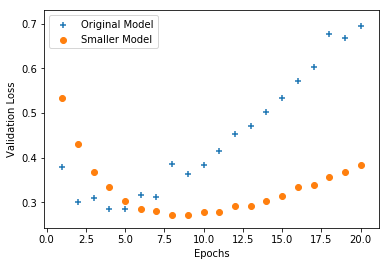

In [30]:
#plt.plot(Epochs, origin_validation_loss_value, 'bo', label='Original Model')
#plt.plot(Epochs, small_validation_loss_value, )
plt.scatter(Epochs, origin_validation_loss_value, marker='+', label='Original Model')
plt.scatter(Epochs, small_validation_loss_value, marker='o', label='Smaller Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

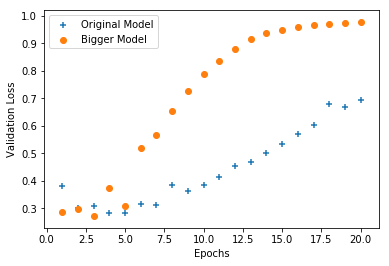

In [31]:
plt.scatter(Epochs, origin_validation_loss_value, marker='+', label='Original Model')
plt.scatter(Epochs, big_validation_loss_value, marker='o', label='Bigger Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [32]:
origin_loss_value = his_origin_dict['loss']
small_loss_value = his_small_dict['loss']
big_loss_value = his_big_dict['loss']

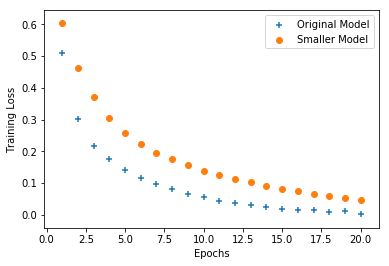

In [33]:
plt.scatter(Epochs, origin_loss_value, marker='+', label='Original Model')
plt.scatter(Epochs, small_loss_value, marker='o', label='Smaller Model')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

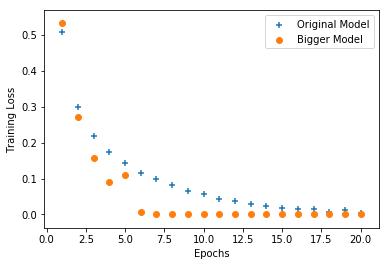

In [34]:
plt.scatter(Epochs, origin_loss_value, marker='+', label='Original Model')
plt.scatter(Epochs, big_loss_value, marker='o', label='Bigger Model')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

In [35]:
from keras import regularizers

In [36]:
# L2权重正则化
def L2_model():
    model = models.Sequential()
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(x_val.shape[1], )))
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model

In [37]:
his_L2 = L2_model().fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
his_L2_dict = his_L2.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 246us/step - loss: 0.5700 - acc: 0.7876 - val_loss: 0.4846 - val_acc: 0.8243
Epoch 2/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.3755 - acc: 0.8954 - val_loss: 0.3678 - val_acc: 0.8756
Epoch 3/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.2948 - acc: 0.9184 - val_loss: 0.3354 - val_acc: 0.8882
Epoch 4/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.2553 - acc: 0.9304 - val_loss: 0.3374 - val_acc: 0.8826
Epoch 5/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.2337 - acc: 0.9399 - val_loss: 0.3418 - val_acc: 0.8823
Epoch 6/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.2180 - acc: 0.9466 - val_loss: 0.3330 - val_acc: 0.8848
Epoch 7/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.2031 - acc: 0.9526 - val_loss: 0.3396 - 

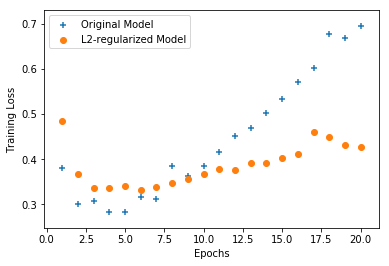

In [39]:
L2_validation_loss_value = his_L2_dict['val_loss']
plt.scatter(Epochs, origin_validation_loss_value, marker='+', label='Original Model')
plt.scatter(Epochs, L2_validation_loss_value, marker='o', label='L2-regularized Model')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

In [42]:
# Dropout正则化
def Dropout_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(x_val.shape[1], )))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model

In [43]:
his_dropout = Dropout_model().fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
his_dropout_dict = his_dropout.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 253us/step - loss: 0.6293 - acc: 0.6353 - val_loss: 0.4973 - val_acc: 0.8389
Epoch 2/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.5130 - acc: 0.7634 - val_loss: 0.4157 - val_acc: 0.8689
Epoch 3/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.4293 - acc: 0.8243 - val_loss: 0.3387 - val_acc: 0.8793
Epoch 4/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.3661 - acc: 0.8583 - val_loss: 0.3065 - val_acc: 0.8803
Epoch 5/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.3192 - acc: 0.8807 - val_loss: 0.2863 - val_acc: 0.8881s: 0.3221 - acc:
Epoch 6/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.2815 - acc: 0.9000 - val_loss: 0.2781 - val_acc: 0.8881
Epoch 7/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.2486 - acc: 0.9113 - val

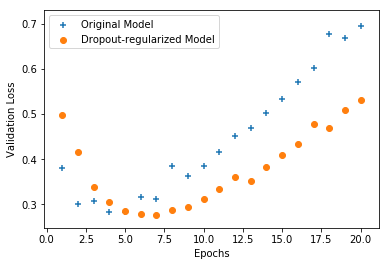

In [45]:
dropout_validation_loss_value = his_dropout_dict['val_loss']
plt.scatter(Epochs, origin_validation_loss_value, marker='+', label='Original Model')
plt.scatter(Epochs, dropout_validation_loss_value, marker='o', label='Dropout-regularized Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [46]:
# Dropout + L2正则化
def Dropout_L2_model():
    model = models.Sequential()
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(x_val.shape[1], )))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model

In [47]:
his_dropout_l2 = Dropout_L2_model().fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
his_dropout_l2_dict = his_dropout_l2.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 269us/step - loss: 0.6713 - acc: 0.6279 - val_loss: 0.5633 - val_acc: 0.8419
Epoch 2/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.5581 - acc: 0.7455 - val_loss: 0.4636 - val_acc: 0.8599
Epoch 3/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.4769 - acc: 0.8097 - val_loss: 0.3932 - val_acc: 0.8773
Epoch 4/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.4163 - acc: 0.8527 - val_loss: 0.3493 - val_acc: 0.8834
Epoch 5/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.3694 - acc: 0.8815 - val_loss: 0.3324 - val_acc: 0.8857
Epoch 6/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.3381 - acc: 0.8983 - val_loss: 0.3598 - val_acc: 0.8742
Epoch 7/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.3128 - acc: 0.9086 - val_loss: 0.3331 - 

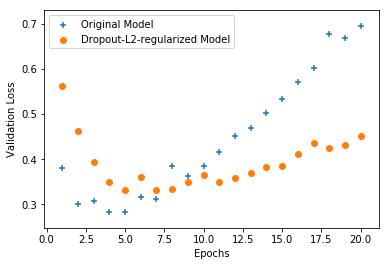

In [48]:
dropout_l2_validation_loss_value = his_dropout_l2_dict['val_loss']
plt.scatter(Epochs, origin_validation_loss_value, marker='+', label='Original Model')
plt.scatter(Epochs, dropout_l2_validation_loss_value, marker='o', label='Dropout-L2-regularized Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

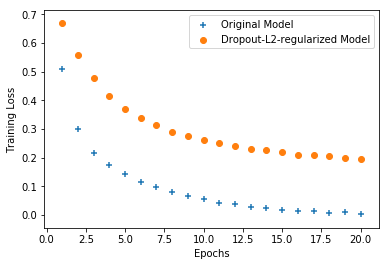

In [49]:
dropout_l2_loss_value = his_dropout_l2_dict['loss']
plt.scatter(Epochs, origin_loss_value, marker='+', label='Original Model')
plt.scatter(Epochs, dropout_l2_loss_value, marker='o', label='Dropout-L2-regularized Model')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()